In [ ]:
import sklearn
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [131]:
# Generate primary first level features
# (+ve word count) (-ve word count) (overall polarity) (times change in pol) (largest + cont) (largest - cont) (capital letters) (punctuation)

import re,csv
import codecs

f3 = codecs.open('/content/gdrive/My Drive/dataset/nonsarcasm_tweets.txt', encoding='utf-8')
csvfile = open('/content/gdrive/My Drive/dataset/nonsarcasm_gen_features.csv','w')
csvwriter =csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)

# print('(+ve word count) (-ve word count) (overall polarity) (times change in pol) (largest + cont) (largest - cont) (capital letters) (punctuation)')
csvwriter.writerow(['(+ve word count) ','(-ve word count)' ,'(overall polarity)' ,'(times change in pol)' ,'(largest + cont)' ,'(largest - cont)' ,'(capital letters)' ,'(punctuation)'])
f2 = open('/content/gdrive/My Drive/dataset/nonsarcasm_tweets_clean.txt')

pattern=re.compile(r'\[(\-?[0-9])\]')
capital_count=[]
puncuation_count=[]
q=0
for l in f3 :
    puncuation_count.append(l.count('!')+l.count('?'))
    for x in range(len(l)-2):
        if l[x]=='.' and l[x+2]=='.':
          puncuation_count[-1]=puncuation_count[-1]+1

# print len(puncuation_count)
for l,inde in zip(f2,range(len(puncuation_count))):
    t= l.split(' ')
    ls=[]
    for x in t :
      try:
        ls.append(int(pattern.findall(x)[0]))
      except:
        continue
    pc,nc=0,0
    lsp,lsn=[],[]

    lsp = list(filter(lambda x:x>0, ls))
    lsn= list(filter(lambda x:x<0, ls))
    change_pol,prev=0,0
    for x in ls :
      if(x==0):
        continue
      if(prev==0 and x>0):prev=1
      elif(prev==0 and x<0):prev=-1
      elif(x>0 and prev<0 or x<0 and prev>0):
       change_pol=change_pol+1
       prev=-1*prev
      
    neg_max,pos_max=0,0
    cur=0
    prev=0
    for x in ls :
      if(x==0):
        continue
      if(prev==0 and x>0):
        prev=1
        cur=1
      elif(prev == 0 and x<0):
        prev = -1
        cur = 1
      elif(x>0 and prev>0 or x<0 and prev<0):cur=cur+1
      elif(x>0 and prev<0 or x<0 and prev>0):
       if(prev<0):neg_max=max(neg_max,cur)
       else:pos_max=max(pos_max,cur)
       prev= -1*prev
       cur=1
       
    else:
      if(prev<0):neg_max=max(neg_max,cur)
      elif(prev>0):pos_max=max(pos_max,cur)

    capital_count.append(sum(list(map(lambda x : x.isupper(),list(l))))-l.count('NAME')*4 - l.count('HYPERLINK')*9)
    try:
      q+=1
      csvwriter.writerow([len(lsp),len(lsn),sum(lsp)+sum(lsn),change_pol,pos_max,neg_max,capital_count[-1],puncuation_count[inde]])
    except Exception as e:
      pass

# print q
csvfile.close()
                                                                                                                                                                                                                                                                                                                                                                                                        

In [ ]:
# Generate primary first level features
# (+ve word count) (-ve word count) (overall polarity) (times change in pol) (largest + cont) (largest - cont) (capital letters) (punctuation)
import re,csv
import codecs
f3 = codecs.open('/content/gdrive/My Drive/dataset/sarcasm_tweets.txt', encoding='utf-8')
csvfile = open('/content/gdrive/My Drive/dataset/sarcasm_gen_features.csv','w')
csvwriter =csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
# print('(+ve word count) (-ve word count) (overall polarity) (times change in pol) (largest + cont) (largest - cont) (capital letters) (punctuation)')
csvwriter.writerow(["(+ve word count)","(-ve word count)" ,"(overall polarity)" ,"(times change in pol)" ,"(largest + cont)" ,"(largest - cont)" ,"(capital letters)" ,"(punctuation)"])
f2 = open('/content/gdrive/My Drive/dataset/sarcasm_tweets_clean.txt')

pattern=re.compile(r'\[(\-?[0-9])\]')
capital_count=[]
punctuation_count=[]
q=0
for l in f3 :
  punctuation_count.append(l.count('!')+l.count('?'))
  for x in range(len(l)-2):
    if l[x]=='.' and l[x+2]=='.':
      punctuation_count[-1]=punctuation_count[-1]+1

# print len(punctuation_count)
for l,inde in zip(f2,range(len(punctuation_count))):
    t= l.split(' ')
    ls=[]
    for x in t :
      try:
        ls.append(int(pattern.findall(x)[0]))
      except:
        continue
    
    pc,nc=0,0
    lsp,lsn=[],[]

    lsp = list(filter(lambda x:x>0 , ls ))
    lsn= list(filter(lambda x:x<0 , ls ))

    change_pol,prev=0,0
    for x in ls :
      if(x==0):
        continue
      if(prev==0 and x>0):prev=1
      elif(prev==0 and x<0):prev=-1
      elif(x>0 and prev<0 or x<0 and prev>0):
        change_pol=change_pol+1
        prev=-1*prev

    neg_max,pos_max=0,0
    cur=0
    prev=0
    for x in ls :
      if(x==0):
        continue
      if(prev==0 and x>0):
        prev=1
        cur=1
      elif(prev == 0 and x<0):
        prev = -1
        cur = 1
      elif(x>0 and prev>0 or x<0 and prev<0):cur=cur+1
      elif(x>0 and prev<0 or x<0 and prev>0):
        if(prev<0):neg_max=max(neg_max,cur)
        else:pos_max=max(pos_max,cur)
        prev= -1*prev
        cur=1
    else:
      if(prev<0):neg_max=max(neg_max,cur)
      elif(prev>0):pos_max=max(pos_max,cur)

    capital_count.append(sum(list(map(lambda x : x.isupper(),list(l))))-l.count('NAME')*4 - l.count('HYPERLINK')*9)
    try:
      q+=1
      csvwriter.writerow([len(lsp),len(lsn),sum(lsp)+sum(lsn),change_pol,pos_max,neg_max,capital_count[-1],punctuation_count[inde]])
    except Exception as e:
      pass

csvfile.close()
  


In [ ]:
# Used to insert gaps in sarcasm_tweets.txt (required for certain codes)
import re
import codecs
import csv
fin = open('/content/gdrive/My Drive/dataset/sarcasm_tweets.txt')
fout = open('/content/gdrive/My Drive/dataset/sarcasm_tweets_gaps.txt','w')

for l in fin:
  fout.write(l)
  fout.write('\n')
  
fout.close()

In [ ]:
# Count emojis from tweers
# Count LOL, ROFL and LMAO

import re
import codecs
import csv
f = codecs.open('/content/gdrive/My Drive/dataset/nonsarcasm_tweets.txt', encoding='utf-8')
count=[]
t=[]
laughexp=[]
for l in f:
    t.append(l)
    count.append(len(re.findall(u'[\U0001f600-\U0001f650]', l)))
    pat1=re.compile(r'(\blols?z?o?\b)+?',re.I)
    pat2=re.compile(r'(\brofl\b)+?',re.I)
    pat3=re.compile(r'(\blmao\b)+?',re.I)
    laughexp.append(len(re.findall(pat1,l)) + len(re.findall(pat2,l)) + len(re.findall(pat3,l)))
    try:
        next(f)
    except:
        break

with open('/content/gdrive/My Drive/dataset/nonsarcasm_emoji.csv','w') as csvfile:
    x=csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
    x.writerow(['emoji_count','laughter_exp_count'])
    for i in range(len(t)):
       x.writerow([count[i],laughexp[i]])

csvfile.close()

In [ ]:
# Count emojis from tweers
# Count LOL, ROFL and LMAO

import re
import codecs
import csv
f = codecs.open('/content/gdrive/My Drive/dataset/sarcasm_tweets_gaps.txt', encoding='utf-8')
count=[]
t=[]
laughexp=[]
for l in f:
    t.append(l)
    count.append(len(re.findall(u'[\U0001f600-\U0001f650]', l)))
    pat1=re.compile(r'(\blols?z?o?\b)+?',re.I)
    pat2=re.compile(r'(\brofl\b)+?',re.I)
    pat3=re.compile(r'(\blmao\b)+?',re.I)
    laughexp.append(len(re.findall(pat1,l)) + len(re.findall(pat2,l)) + len(re.findall(pat3,l)))

with open('/content/gdrive/My Drive/dataset/sarcasm_emoji.csv','w') as csvfile:
    x=csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
    x.writerow(['emoji_count','laughter_exp_count'])
    for i in range(len(t)):
      x.writerow([count[i],laughexp[i]])

csvfile.close()

In [133]:
# Create bag of words dictionary for unigram features
import codecs
import re
sarcasm_file=codecs.open('/content/gdrive/My Drive/dataset/sarcasm_tweets.txt', encoding='utf-8')
nonsarcasm_file=codecs.open('/content/gdrive/My Drive/dataset/nonsarcasm_tweets.txt', encoding='utf-8')

s=set()
for x in sarcasm_file:
    # remove emoticons
    pattern=r'[\U0001f600-\U0001f650]'
    # remove pattern
    re.sub(pattern,'',x)
    l=x.split()
    for word in l:
      word=word.lower()
      s.add(word)

for x in nonsarcasm_file:
    # remove emoticons
    pattern=r'[\U0001f600-\U0001f650]'
    # remove pattern
    re.sub(pattern,'',x)
    l=x.split()
    for word in l:
      word=word.lower()
      s.add(word)

dic={}
word_index=11
for q in s:
  dic[word_index]= q
  word_index+=1

vocab_file=codecs.open('/content/gdrive/My Drive/dataset/vocab.txt','w',encoding='utf-8')
for x in dic:
  vocab_file.write(str(x)+':'+dic[x]+'\n')


In [121]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout
from tensorflow.keras.models import Model
import pandas as pd

In [122]:
# training data
data = pd.read_csv("/content/gdrive/My Drive/dataset/datasetnlp.csv")

In [123]:
data.head()

,X..ve.word.count.,X..ve.word.count..1,X.overall.polarity.,X.times.change.in.pol.,X.largest...cont.,X.largest...cont..1,X.capital.letters.,X.punctuation.,emoji_count,laughter_exp_count,Type
0,1,0,1,0,1,0,10,0,0,1,1
1,0,1,-1,0,0,1,6,4,0,0,1
2,0,1,-2,0,0,1,1,2,0,0,1
3,1,0,2,0,1,0,2,1,0,0,1
4,1,0,2,0,1,0,5,0,0,0,1


In [124]:
X = data.iloc[:,: -1].values
y = data.iloc[:, -1].values

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=42)
N,D=X_train.shape

In [126]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [128]:
i = Input(shape=(D,))
x = Dense(10, activation='relu')(i)
x = Dense(5)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)

model.compile(
    optimizer='adam',
        loss='binary_crossentropy',
            metrics=['accuracy']
)
r=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)
print("Train score : ", model.evaluate(X_train,y_train))
print("Test score : ",model.evaluate(X_test,y_test))

Epoch 1/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5742 - val_loss: 0.6372 - val_accuracy: 0.6489
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6153 - accuracy: 0.6644 - val_loss: 0.5831 - val_accuracy: 0.7111
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5760 - accuracy: 0.6911 - val_loss: 0.5531 - val_accuracy: 0.7199
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.7046 - val_loss: 0.5380 - val_accuracy: 0.7417
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5407 - accuracy: 0.7121 - val_loss: 0.5297 - val_accuracy: 0.7393
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5335 - accuracy: 0.7133 - val_loss: 0.5251 - val_accuracy: 0.7417
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.7189 - val_loss: 0.5207 - val_accuracy: 0.7490
Epoch 8/100
7

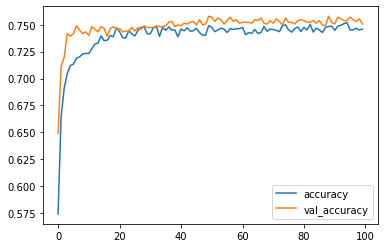

In [129]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
import math
import numpy as np
import csv
from keras.models import Sequential
from keras.layers import Dense
import random
import math
from sklearn.metrics import precision_recall_curve

def read_input():
  A = [];
  b = [];
  C = [];
  with open('/content/gdrive/My Drive/dataset/nonsarcasm_final_features.csv', 'rt') as csvfile:
    file = csv.reader(csvfile, delimiter=',', quotechar='|')
    init = 1
    for row in file:
      if(init == 1):
        init = 0
        continue
      temp = [float(i) for i in row]
      A.append(temp[0:10])
      b.append(0)

  with open('/content/gdrive/My Drive/dataset/sarcasm_final_features.csv', 'rt') as csvfile:
    file = csv.reader(csvfile, delimiter=',', quotechar='|')
    init = 1
    for row in file:
          if(init == 1):
            init = 0
            continue
          temp = [float(i) for i in row]
          A.append(temp[0:10])
          b.append(1)
          A = np.asarray(A)
          b = np.asarray(b)

          D = np.c_[A, b]
          np.random.shuffle(D)

          X = D[:,0:10]
          y = D[:,10]
          return X,y

[A,b] = read_input()
#print(b)

num_rows, num_cols = A.shape
n_train = int(num_rows*0.80)
X = A[0:n_train,:]
Y = b[0:n_train]

X_valid = A[n_train:num_rows,:]
Y_valid = b[n_train:num_rows]
# print("data processed")


n_input = 10
n1=5
n2=1

model = Sequential()
model.add(Dense(units = 128, activation='relu'))  
model.add(Dense(units = 1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, batch_size=10)
scores = model.evaluate(X_valid, Y_valid)
test_classes = model.predict_classes(X_valid)

p_label = test_classes
p_actual = Y_valid
tp,fp,tn,fn=0.0,0.0,0.0,0.0
for predicted,actual in zip(p_label,p_actual):
    if(predicted==actual and predicted==1): tp+=1
    elif(predicted==actual and predicted==0):tn+=1
    elif(predicted==0):fn+=1
    else:fp+=1

try:
  precision = float(tp)/float(tp+fp)
except ZeroDivisionError:
  precision = 0

try:
  recall = float(tp)/float(tp+fn)
except ZeroDivisionError:
  recall = 0

try:
  fscore = 2*precision*recall/(precision+recall)
except ZeroDivisionError:
  fscore = 0

print("\n", tp, fp)
print("precision: ",precision)
print("recall: ",recall)
print("f-measure",fscore)

print("accuracy",scores[1])
                                                         

[0. 0. 0. ... 0. 0. 0.]
9/9 [==============================] - 0s 1ms/step - loss: 0.0397 - accuracy: 1.0000

 0.0 0.0
precision:  0
recall:  0
f-measure 0
accuracy 1.0
